In [1]:
# Load iris data from sklearn

from sklearn import datasets

iris = datasets.load_iris()

In [9]:
# Print out columns index of iris data

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
# Print iris names

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

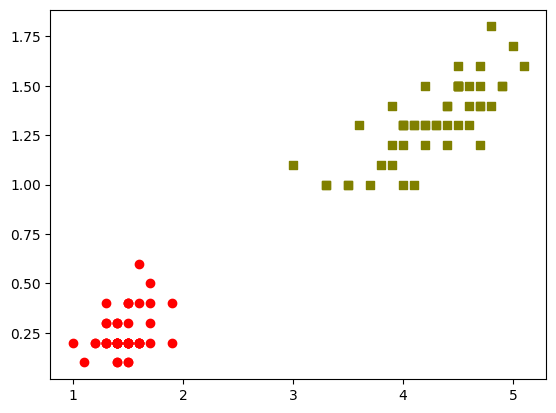

In [31]:
# Plot iris types across the width and length with different shapes and colors using matplotlib

import matplotlib.pyplot as plt

sentosa = (iris.target == 0)
versicolor = (iris.target == 1)
virginica = (iris.target == 2)

plt.scatter(iris.data[sentosa, 2], iris.data[sentosa, 3], marker='o', c='r')
plt.scatter(iris.data[versicolor, 2], iris.data[versicolor, 3], marker='s', c='olive')
# plt.scatter(iris.data[virginica, 2], iris.data[virginica, 3], marker='o', c='g')






In [2]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [10]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [57]:
X,y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=100, loss='hinge'))
])
polynomial_svm_clf.fit(X, y)

/home/zq/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=100, loss='hinge'))])

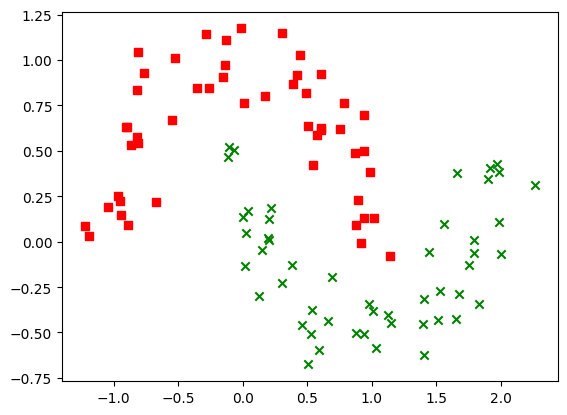

In [35]:
plt.scatter(X[y==0,0],X[y==0,1], c='red', marker='s')
plt.scatter(X[y==1,0],X[y==1,1], c='green', marker='x')

In [42]:
X[:,0]

array([ 9.89003209e-01,  2.89229555e-02,  3.07430967e-01,  2.08557392e-01,
        1.55893597e+00,  1.93212559e-01,  9.42468562e-01,  5.47279130e-01,
        1.14528186e+00,  6.04239292e-01,  1.79672644e+00, -8.20584897e-01,
       -8.64878649e-01,  1.52894916e+00, -5.50050717e-01,  1.40529359e+00,
        5.91861743e-01,  2.27017614e+00, -5.24149201e-01, -1.14883145e-01,
       -8.14855585e-01,  4.17158917e-02, -6.29424030e-02,  8.92385388e-01,
        1.40021717e+00,  8.78499292e-01, -9.39765051e-01, -1.51292809e-01,
       -1.04206025e+00,  1.44873113e+00, -2.80189962e-01, -8.87987185e-01,
        3.81405493e-01,  1.15229047e+00,  3.77485304e-04,  1.83201638e+00,
        4.41892067e-01,  1.51643109e+00,  2.20326199e-01,  4.22477455e-01,
        5.06647692e-01,  9.40586041e-01,  1.25835940e-01,  1.65647471e+00,
       -1.19106417e+00,  1.01054661e+00,  9.39448052e-01,  9.16975240e-01,
        1.12558091e+00,  9.43747421e-01,  1.75181202e+00,  5.35356163e-01,
        1.40387880e+00,  

In [47]:
polynominalfetures = PolynomialFeatures(degree=2)

X_poly = polynominalfetures.fit_transform(X)

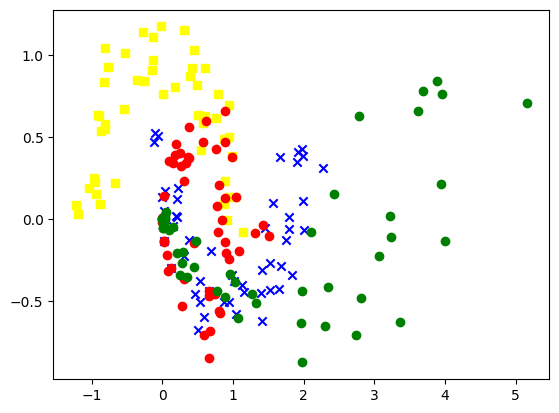

In [56]:
plt.scatter(X[y==0,0],X[y==0,1], c='yellow', marker='s')
plt.scatter(X[y==1,0],X[y==1,1], c='blue', marker='x')
plt.scatter(X_poly[y==0,3],X_poly[y==0,4], c='red', marker='o')
plt.scatter(X_poly[y==1,3],X_poly[y==1,4], c='green', marker='o')


In [64]:
svm_clf = polynomial_svm_clf.named_steps['svm_clf']